In [1]:
import numpy as np
import matplotlib.pyplot as plt

<img src='otherplots.jpg' width='800px'>

([], [])

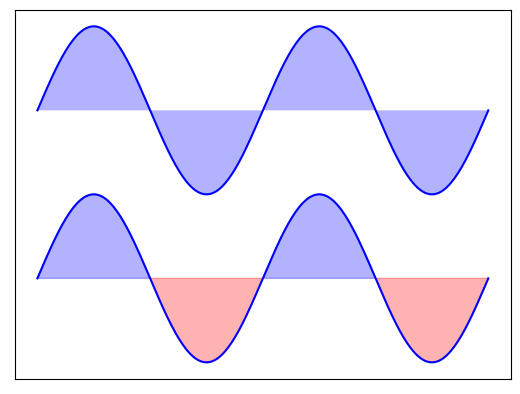

In [2]:
# fill between
n = 256
X = np.linspace(-np.pi, np.pi, n)
Y = np.sin(2 * X)

plt.plot(X, Y + 1, color='blue', alpha=1.00)
plt.fill_between(X,Y+1,1,facecolor='b',alpha=0.3)
plt.plot(X, Y - 1, color='blue', alpha=1.00)
plt.fill_between(X,Y-1,-1,Y>0,color='b',alpha=0.3)
plt.fill_between(X,Y-1,-1,Y<0, color='r',alpha=0.3)
plt.xticks([])
plt.yticks([])


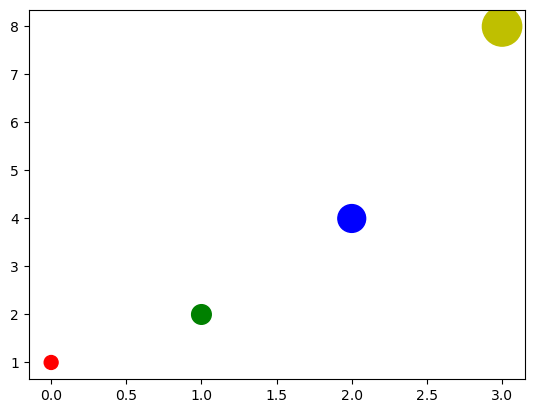

In [3]:
# scatter simple example
# scatter(x좌표들,  y좌표들, color들,size들)
plt.scatter([0,1,2,3],[1,2,4,8],c=['r','g','b','y'],s=[100,200,400,800])

([<matplotlib.patches.Wedge at 0x1cdef950c10>,
 [Text(1.0461621663333946, 0.3399186987098808, ''),
  Text(0.33991867422268784, 1.0461621742897658, ''),
  Text(-1.0461621902025062, 0.3399186252483017, ''),
  Text(0.3399188211458418, -1.0461621265515308, '')])

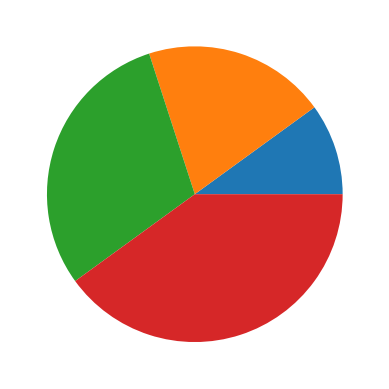

In [5]:
#pie
#pie(상대적인 크기 array, colors=color array)
import matplotlib.colors as mcols

z=[1,2,3,4]
colors = list(mcols.TABLEAU_COLORS)
cols = colors[:4]
plt.pie(z,colors=cols)

In [1]:
import matplotlib.colors as mcols
import numpy as np
z=[1,2,3,4]
colors = np.array(list(mcols.TABLEAU_COLORS))
z=[3,2,4,1]
plt.pie(z,colors=cols[z])

NameError: name 'plt' is not defined

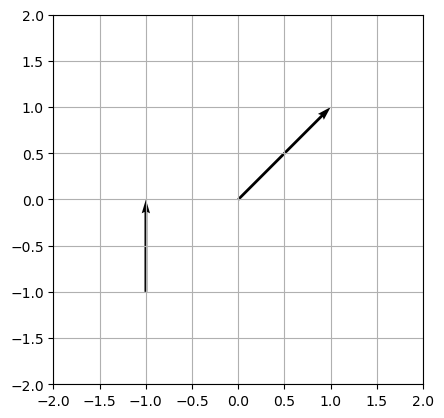

In [6]:
# quiver
# quiver(시점 x, 시점 y, 크기 x, 크기 y, **args)

# simple quiver example
# 2차원에서 1:1 크기로 그리기 위한 argment
args = dict(scale=1,scale_units='xy',angles='xy')
plt.quiver(0,0,1,1,**args)
plt.quiver(-1,-1,0,1,**args)
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.gca().set_aspect('equal')
plt.grid()

---
### 근 찾기
- 근을 찾는 영역을 잘게 나누어 함수값이 0에 가까운 것을 찾는다 (resolution이 늘어날 수록 array가 커진다.)
- 기본적인 방법들
    - bisection method
    - Newton-Raphson method
    
##### **Bisection Method**  
|그림 1. 중간값의 정리|그림 2. Bisection Method|
|:--:|:--:|
|<img src='intermediate-value-theorem.png' width='300px'>|<img src='Bisection-Method.png' width='300px'> |
 
- 중간값의 정리: 
    - $f(x)$가 closed interval $[a,b]$에서 연속이고 
    - $sign\left( f(a)\right)\ne sign\left( f(a)\right)$ 이면 
    - $f(c)=0$을 만족하는 $c$가 open interval $(a,b)$안에 존재한다  

- Bisection Method
    - $a,b$의 중간값을 $m$이라고 하면
    - $f(m)$이 tolerance보다 작으면 $m$이 해이다.
    - 그렇지 않으면 $f(a), f(b)$ 중에서 $f(m)$ 부호가 다른 것의 $x$ 값과 $m$을 사용하여 이 과정을 반복한다.

#### **Newton-Raphson method**

<img src='Newton-step.png' width='300px'>

- $x_0$가 근 $x_r$의 추측값이라고 하자
- $x_0$가 $x_r$하고 매우 가까운 추측값이라고 하면 $f(x)$는 $x_0$에서 $x_r$ 까지 거의 직선으로 움직일 것이다.
- 즉 $f'(x_0)$는 $x_0$하고 가까운 임의의 $x$를 이용하여 다음과 같이 근사할 수 있다.
$$ f'(x_0) \approx \frac{f(x)-f(x_0)}{x-x_0}$$ 
- 그러므로 $f(x)=0$ 을 만족시키는 $x_0$ 근처의 $x$ 값을 $x_1$ 이라고 하면 $f(x_1)=0$ 이므로
- $ x_1=x_0-\frac{f(x_0)}{f'(x_0)}$ 로 구할 수 있고,
- 이 $x_1$은 근 $x_r$에 보다 가까울 것이다. 
- 그러므로 다음과 같은 **Newton step**은 점점 근 $x_r$로 접근할 것이다.
$$x_i = x_{i-1} - \frac{f(x_{i-1})}{f'(x_{i-1})}$$
- **Newton-Raphson** method 는 상기 **Newton step** 을 error가 허용치 (tolerance) 이내에 들어올 때까지 반복하는 것이다.

In [7]:
# Newton-Raphson 예제
f = lambda x: x**2 - 2
f_prime = lambda x: 2*x

x0=1.4 #초기 추측값
x1 = x0 - f(x0)/f_prime(x0) #첫번 째 근사 값
x2 = x1 - f(x1)/f_prime(x1) #두번 째 근사 값

print("sqrt(2) =", np.sqrt(2))
print('1st 근사치 =',x1)
print('2nd 근사치 =',x2)

sqrt(2) = 1.4142135623730951
1st 근사치 = 1.4142857142857144
2nd 근사치 = 1.4142135642135643


---
### 적분
<img src='illustration_integral.png' width='500px'><br>

- Riemann's integral
- $x_{i+1}-x_i=h$ 이라면

> 왼쪽 end point
>> $$\int_a^b f(x)dx \approx \sum_{i=0}^{n-1} hf(x_i)$$ 
>오른 쪽 end point
>> $$\int_a^b f(x)dx \approx \sum_{i=1}^{n} hf(x_i)$$ 
> 사다리꼴 적분
>> $$\int_a^b f(x)dx \approx \sum_{i=0}^{n-1} h(f(x_i)+f(x_{i+1})/2$$ 

- bin 수를 늘려가면서 적분하면 적분값에 점점 가까워진다.
- 사다리꼴 적분이 upper나 lower bound보다 빨리 적분값에 가까워진다.

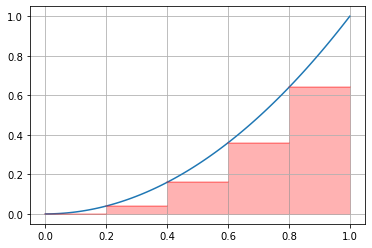

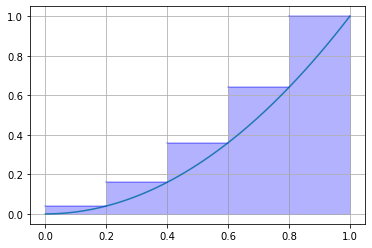

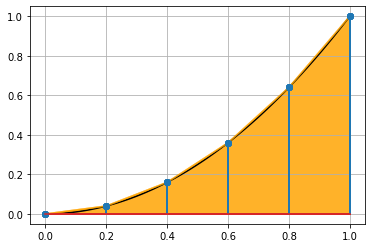

In [12]:
nbins = 5 #bin의 개수
x=np.linspace(0,1,nbins+1)
h=x[1]-x[0] #bin의 폭

f=x**2
xs = np.linspace(0,1,100)
fs = xs**2
# lower bound
plt.plot(xs,fs)
for i in range(nbins):
    plt.plot([x[i],x[i+1]],[f[i],f[i]],'r',alpha=0.3)
    plt.fill_between([x[i],x[i+1]],[f[i],f[i]],color='r',alpha=0.3)
plt.grid()
plt.figure()
# upper bound
plt.plot(xs,fs)
for i in range(nbins):
    plt.plot([x[i],x[i+1]],[f[i+1],f[i+1]],'b',alpha=0.3)
    plt.fill_between([x[i],x[i+1]],[f[i+1],f[i+1]],color='b',alpha=0.3)
plt.grid()
# 사다리꼴 근사
plt.figure()
plt.plot(xs,fs,'k')
for i in range(nbins):
    plt.plot(x,f,'orange',alpha=0.3)
    plt.fill_between(x,0,f,color='orange',alpha=0.3)
    plt.stem(x,f)
plt.grid()

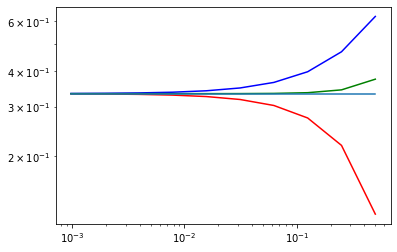

In [14]:
# bin수에 따른 적분 값으로의 접근 경향
nbins = 1
iterations = 10
step_size = [] 
lsum = [] 
usum = []
tsum = []
for iter in range(iterations):
    nbins *= 2
    x = np.linspace(0,1,nbins+1)
    y = x**2
    width=x[1]-x[0]
    step_size.append(width)
    lsum.append(width*np.sum(y[:-1]))
    usum.append(width*np.sum(y[1:]))
    tsum.append(width*(np.sum((y[:-1]+y[1:])/2)))
plt.loglog(step_size,lsum,'r')
plt.loglog(step_size,usum,'b')
plt.loglog(step_size,tsum,'g')
plt.loglog(step_size,1/3*np.ones(len(step_size)))

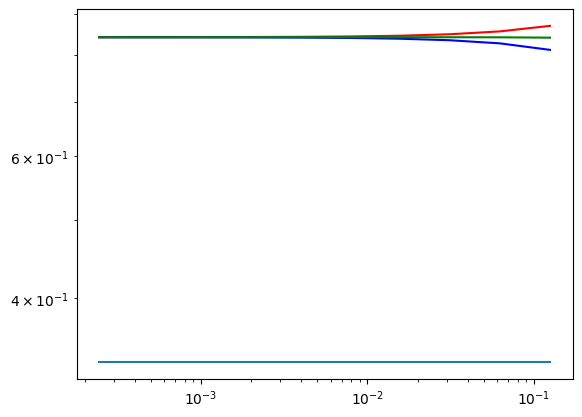

In [3]:
import numpy as np
import matplotlib.pyplot as plt

nbins = 4
iterations = 10
step_size = [] 
lsum = [] 
usum = []
tsum = []
for iter in range(iterations):
    nbins *= 2
    x = np.linspace(0,1,nbins+1)
    y = np.cos(x)
    width=x[1]-x[0]
    step_size.append(width)
    lsum.append(width*np.sum(y[:-1]))
    usum.append(width*np.sum(y[1:]))
    tsum.append(width*(np.sum((y[:-1]+y[1:])/2)))
plt.loglog(step_size,lsum,'r')
plt.loglog(step_size,usum,'b')
plt.loglog(step_size,tsum,'g')
plt.loglog(step_size,1/3*np.ones(len(step_size)))

    fjac: array([[-1.]])
     fun: array([0.])
 message: 'The solution converged.'
    nfev: 8
     qtf: array([1.68824954e-11])
       r: array([-41.2596394])
  status: 1
 success: True
       x: array([0.2670263])
    fjac: array([[-1.]])
     fun: array([-8.52651283e-14])
 message: 'The solution converged.'
    nfev: 7
     qtf: array([3.06867776e-08])
       r: array([41.259763])
  status: 1
 success: True
       x: array([0.75705769])
0.27 0.76


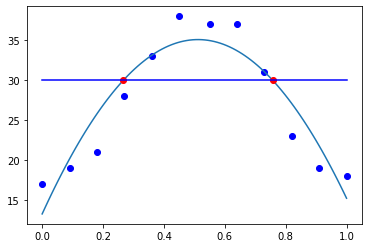

In [19]:
# fitting 후 root 찾기
inp=np.genfromtxt('rootfinding.txt')
X=inp[:,0]
Y=inp[:,1]
plt.plot(X,Y,'bo')
#define a function-cosine같다
def f(x,a,b,offset):
    return a*np.cos(x-offset)+b

p,cov = opt.curve_fit(f,X,Y,p0=[1,1,0.5])
def g(x):
    global p
    return p[0]*np.cos(x-p[2])+p[1]-30

Xi = np.linspace(X[0],X[-1],100)
plt.plot(Xi,f(Xi,p[0],p[1],p[2]))
res1 = opt.root(g,0.2)
res2 = opt.root(g,0.8)
print(res1)
print(res2)
plt.plot(res1.x[0],f(res1.x[0],p[0],p[1],p[2]),'ro')
plt.plot(res2.x[0],f(res2.x[0],p[0],p[1],p[2]),'ro')
plt.plot(X,30*np.ones(len(X)),color='b')
print(res1.x[0].round(2),res2.x[0].round(2))


[0.74]


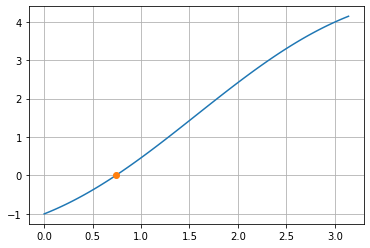

In [24]:
# root finding
from scipy.optimize import root

f1=lambda x: x-np.cos(x)
x=np.linspace(0,np.pi, 100)
plt.plot(x,f1(x))
res=root(f1,0)
print(res.x.round(2))
plt.plot(res.x,res.fun,'o')
plt.grid()

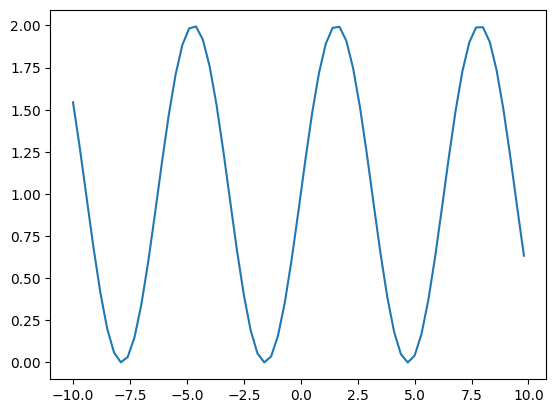

In [4]:
# minimize example 2
def f(x):
    return 1+np.sin(x)

x=np.arange(-10,10,0.3)
plt.plot(x,f(x))

In [5]:
# 초기 값의 영향을 잘 생각할 것
result = opt.minimize(f,x0=1,bounds=((-2.5,0),))
print(result)
plt.plot(x,f(x))
plt.plot(result.x, f(result.x),'r*')
plt.grid()
print('fun is', result.fun,f(result.x))

NameError: name 'opt' is not defined

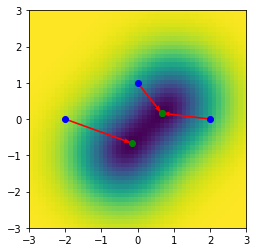

In [28]:
# 2 gaussian valley
# 2차원일 경우에는 먼저 visualize를 해 보는 것이 원하는 local minimum을 구할 수 있다.
def doubleValley(X):
    m1=[1,0.5]
    m2=[-0.5,-1]
    x,y=X
    return 2-np.exp(-((x-m1[0])**2+(y-m1[1])**2)/2)-np.exp(-((x-m2[0])**2+(y-m2[1])**2)/2)

xm,xM = -3,3
ym,yM = -3,3
x=np.linspace(xm,xM)
y=np.linspace(ym,yM)
xv,yv=np.meshgrid(x,y)
#ax=plt.subplot(projection='3d')
#ax.plot_surface(xv,yv,doubleValley((xv,yv)))
plt.imshow(np.log(doubleValley((xv,yv))),extent=[xm,xM,ym,yM],origin='lower')
x0s=[(-2,0),(2,-0),(0,1)]
for x0 in x0s:
    minp = opt.minimize(doubleValley,x0)
    plt.plot(x0[0],x0[1],'bo')
    plt.plot(minp.x[0],minp.x[1],'go')
    plt.quiver(x0[0],x0[1],minp.x[0]-x0[0],minp.x[1]-x0[1],scale=1,scale_units='xy',angles='xy',color='r')

**정규분포표의 이용**
- 표준점수
$$z=\frac{x-\mu}{\sigma}$$
- cdf (cumulative distribution function)
$$cdf(z)=\int_{-\infty}^{z} \frac{1}{\sqrt{2\pi}}e^{\frac{x^2}{2}}dx$$
- ppf(percent point function, or quantiel function)  
$ppf(q)$는$\int_{-\infty}^{z} \frac{1}{\sqrt{2\pi}}e^{\frac{x^2}{2}}dx=q$를 만족하는 $z$

- 다음은 A 회사의 두루마리 화장지의 100개 sample 조사이다.

|길이 (m)| 빈도수|
|--|--|
|68| 15|
|69| 25|
|70| 40|
|71| 15|
|72| 5|

- 이 회사의 화장지 길이가 정규분포라고 가정했을 때 다음에 답하여라
    1. 화장지를 샀을 때 길이가 71m보다 클 확률은?
    2. 화장지의 길이가 가장 긴 5%에 들어가려면 몇 m보다 커야 하는가?

In [31]:
# 상기 도수분포표의 mean, std
from scipy import stats
x=np.array([68,69,70,71,72])
f=np.array([15,25,40,15,5])
m=np.sum(x*f)/np.sum(f)
var=np.sum((x-m)**2*f)/np.sum(f)
s=np.sqrt(var)
print(m,s)
# numpy 함수를 이용하기 위하여 repeat를 이용하여 표본을 복원한다.
samples=np.repeat(x,f)
print(samples.mean(),samples.std())
dist=stats.norm(loc=m,scale=s)
#71m보다 클 확률: cumulative density function (cdf) 를 이용한다.
print(1-dist.cdf(71))
#5%에 들어가려면: percent point function (ppf) 를 이용한다.
print(dist.ppf(0.95))

69.7 1.0535653752852738
69.7 1.0535653752852738
0.10861907957743289
71.43296082876847


In [18]:
from scipy import stats
import numpy as np
f=open('GaussianSamples.txt','r')
nlst=[]
content = f.readlines()
for line in content:
    nlst.append(content)
nlst=np.array(nlst,dtype=int)
lst=[]
for nlst in nlst:
    lst.append(nlst-sum(nlst)/20)
lst=np.array(lst,dtype=int)

x=np.array([68,69,70,71,72])
f=np.array([15,25,40,15,5])
print(sum(nlst)/20)
m=np.sum(nlst)/np.sum(lst)
var=np.sum((nlst-m)**2*f)/np.sum(lst)
s=np.sqrt(var)
print(m,s)
# numpy 함수를 이용하기 위하여 repeat를 이용하여 표본을 복원한다.
samples=np.repeat(nlst,f)
print(samples.mean(),samples.std())
dist=stats.norm(loc=m,scale=s)
#71m보다 클 확률: cumulative density function (cdf) 를 이용한다.
print(1-dist.cdf(71))
#5%에 들어가려면: percent point function (ppf) 를 이용한다.
print(dist.ppf(0.95))


ValueError: invalid literal for int() with base 10: '1.27\n'

In [33]:
# distribution function 없이 percent point 를 알려면 
# 즉 바로 sample에서 알려면 scoreatpercentile 함수를 사용한다.
#median과 percentile
print(np.median(samples))
print(stats.scoreatpercentile(samples,50))
print(stats.scoreatpercentile(samples,10))

70.0
70.0
68.0


#### statistical test
- 한국인 남자 16세 여자 20~24 키의 통계이다 (sizekorea.kr)
- 남자 (16)
    - bins: 1561,1618,1676,1733,1790,1848,1905
    - frqs: 4,53,88,74,27,5
- 여자 (20~24)
    - bins: 1444,1500,1556,1612,1668,1724,1780
    - frqs: 6,75,236,277,105,15
- 0.1% 유의수준에서 
    - 13세 남자는 20~24세 여자보다 크다고 할 수 있는가?
    - 14세 남자는 어떤가?

In [34]:
# 13세 한국 남자 키 통계 sizekorea.kr
# man: m=1588.45	s=	79.51
# 20~24 한국 여자 키 통계 sizekorea.kr
#woman: m=1617.85	s=51.61
#13세 남자
# tval, pval = stats.ttest_ind(samples1, samples2)
# tval>0 samples2의 평균이 높다
# pval은 유의 수준임.

m1bins=np.array([1349,1427,1505,1583,1661,1739,1817])
m1hist=np.array([12,87,204,227,113,18])
#14세 남자
m2bins=np.array([1399,1478,1557,1636,1716,1795,1874])
m2hist=np.array([10,56,198,245,89,3])
#20~24 여자
fbins=np.array([1444,1500,1556,1612,1668,1724,1780])
fhist=np.array([6,75,236,277,105,15])
m1x=(m1bins[1:]+m1bins[:-1])/2
m1samps = np.repeat(m1x,m1hist)
m2x=(m2bins[1:]+m2bins[:-1])/2
m2samps = np.repeat(m2x,m2hist)
fx=(fbins[1:]+fbins[:-1])/2
fsamps = np.repeat(fx,fhist)
tval, pval = stats.ttest_ind(m1samps,fsamps)
print(tval, pval)
tval, pval = stats.ttest_ind(m2samps,fsamps)
print(tval, pval)

-7.560071362698696 7.333238395643673e-14
7.049703069669347 2.889387257504249e-12


#### FFT

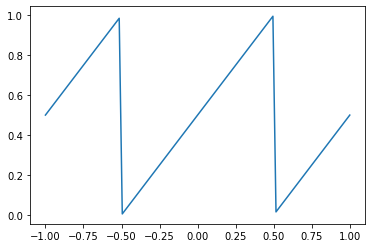

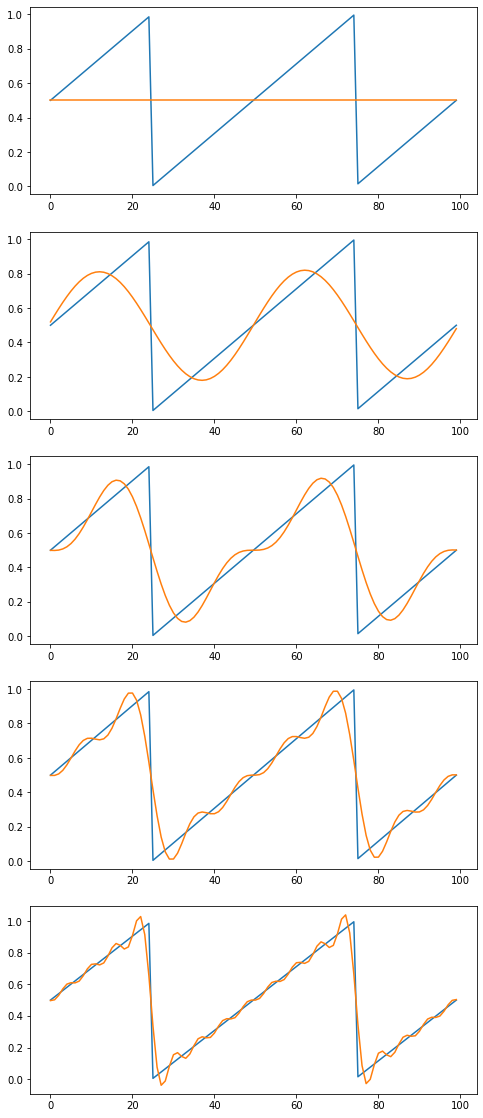

In [39]:
# nth harmonic까지만 남겨서 ifft 했을 경우의 복원 신호
from scipy import fftpack

# 톱니파 예제
T=1
x=np.linspace(-T,T,100)
y=x+0.5
y[np.where(x <= -T/2)] += T
y[np.where(x > T/2)] -= T
plt.plot(x,y)

fs = fftpack.fft(y)

hms = [0, 2, 4, 8, 16]
nop = len(hms)
plt.figure(figsize=(8,nop*4))
for idx, noh in enumerate(hms):
    ffs = fs.copy()
    if noh == 0: ffs[1:]=0
    else: ffs[noh+1:-noh]=0
    rs = fftpack.ifft(ffs)
    plt.subplot(len(hms),1,idx+1)
    plt.plot(y)
    plt.plot(rs.real)

#### sound example
**음계**
- A440 은 440Hz 라음
- A880 은 높은 라음
- 12반음을 올리면 2배 주파수가 된다.
- 가온다 부터 다음과 같은 순서로 $2^{1/12}$ 배로 계산하면 된다.
    - C, C#, D, D#, E, F, F#, G, G#, A, A#, B, C
    - C freq: $440\times -2^{\frac{9}{12}}$

#### 사람 목소리의 저주파 특성
- 저주파만으로 복원했을 때의 사람 목소리
    - 사람이 누구인지 무슨 소리인지 알기 위하여 4kHz까지만 있어도 된다
    - 전화는 목소리를 4KHz로 잘라내서 8kHz로 sampling하여 각 sample 당 8bit를 할당한다
    - 그러므로 64kbps로 통신하고 있다.
- 음악은 20kHz 전체를 들려주기 위하여 44.1kHz 16bit로 sampling한다.
    - FM: 10kHz
    - 전화 노래방 소리는 품질이 안 좋다.
    - 압축필요: MPEG layer 3 (mp3)

**image FFT**

(302, 598, 4)

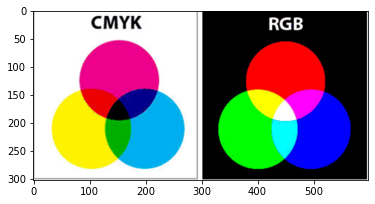

In [40]:

img = plt.imread('panel_description_color_cmy_rgb.gif')
plt.imshow(img)
img.shape

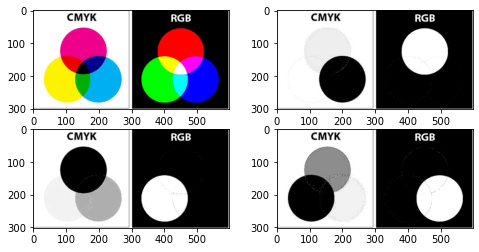

In [42]:
# color 채널 display
plt.figure(figsize=(8,4))
plt.subplot(221)
plt.imshow(img)
plt.subplot(222)
gimg = img[:,:,0]
plt.imshow(gimg,cmap='gray')
plt.subplot(223)
gimg = img[:,:,1]
plt.imshow(gimg,cmap='gray')
plt.subplot(224)
gimg = img[:,:,2]
plt.imshow(gimg,cmap='gray')

**2d fft images**
- image 에서 폭이 작으면 주파수 영상에서 폭이 커진다.
- 수직 패턴은 주파수 영상에서 x축에 몰려있다.
- 수평 패턴은 주파수 영상에서 y축에 몰려 있다.
- 원형 대칭 영상은 주파수 영상이 원형 대칭이다.

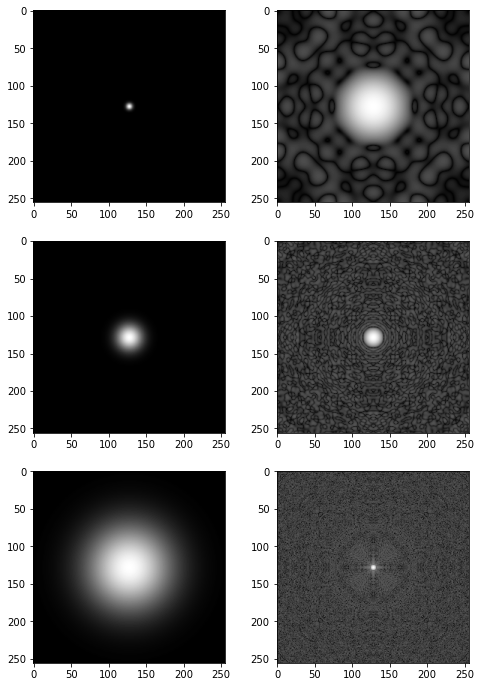

In [44]:
# image 폭이 작으면 주파수가 퍼진다.
def f(x,y,s,N):
    return 256*np.exp(-((x-N/2)**2+(y-N/2)**2)/(2*s**2))
def makeImg(s,N):
    img = np.zeros((N,N))
    x=np.arange(N)
    y=np.arange(N)
    xv,yv=np.meshgrid(x,y)
    img=f(xv,yv,s,N).astype(int)
    return img

N=256
imgl = [makeImg(3,N),makeImg(12,N),makeImg(40,N)]
noi = len(imgl)
plt.figure(figsize=(8,12))
for i in range(noi):
    img = imgl[i]
    plt.subplot(noi,2,i*2+1)
    plt.imshow(img,cmap='gray')
    fimg=fftpack.fft2(img)
    fimg_s=fftpack.fftshift(fimg)
    plt.subplot(noi,2,i*2+2)
    plt.imshow(np.log(1+np.abs(fimg_s)),cmap='gray')

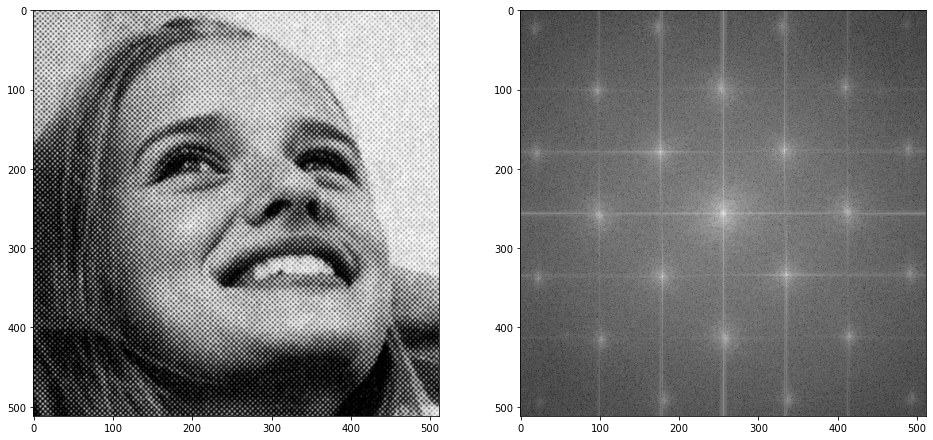

In [46]:
# filtering example (인쇄한 영상 스캔한 영상)
# 인쇄 패턴이 보일 정도로 스캔하면 원래 주파수 성분이 패턴형태로 반복된다 (modulation effect)
# 인쇄 패턴을 없애기 위해 원래 주파수 성분이라고 생각되는 부분만 남기고 지운다음 ifft2 한다.
img = plt.imread('print.tif')
plt.figure(figsize=(16,8))
plt.subplot(121)
plt.imshow(img,cmap='gray')
fimg = fftpack.fft2(img)
fimg_s=fftpack.fftshift(fimg)
plt.subplot(122)
plt.imshow(np.log(1+np.abs(fimg_s)),cmap='gray')

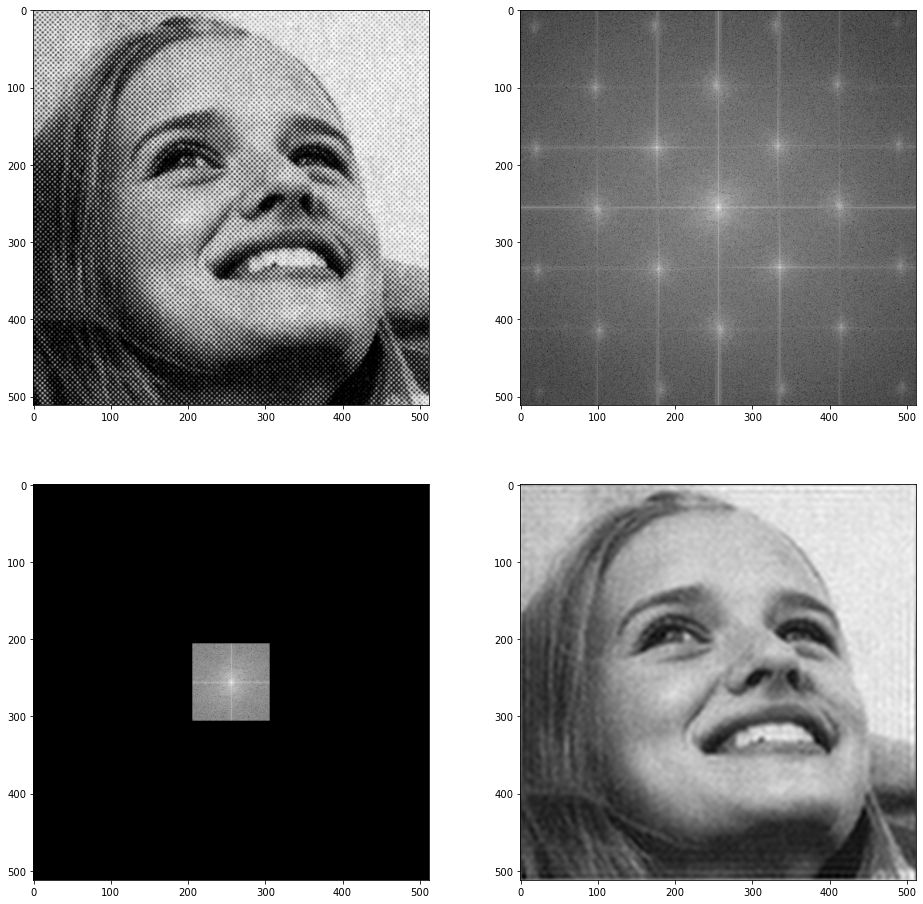

In [47]:
ffimg_s=fimg_s*0
w=50
ffimg_s[256-50:256+50,256-50:256+50]=fimg_s[256-50:256+50,256-50:256+50]
ffimg=fftpack.fftshift(ffimg_s)
rimg = fftpack.ifft2(ffimg).real

plt.figure(figsize=(16,16))
plt.subplot(221)
plt.imshow(img,cmap='gray')
plt.subplot(222)
plt.imshow(np.log(1+np.abs(fimg_s)),cmap='gray')
plt.subplot(223)
plt.imshow(np.log(1+np.abs(ffimg_s)),cmap='gray')
plt.subplot(224)
plt.imshow(rimg,cmap='gray')